The project contain pre-assesment and clearing of the data, including ETL process.

The data set includes information about the characteristics of red wine and its quality, based on the results of the evaluation of characteristics.

The main goal is to carry out preliminary data processing to bring the data into a form without abnormal wine varieties that do not fit the average statistical parameters.

According to the data obtained as a result of achieving the goal, it will be possible to track the variability of the characteristics of the wine of the most popular varieties and predict the quality of the drink depending on the calculated parameters.
The data can be grouped by classes of different characteristics. 
The target attribute is the quality of the wine.


Link to the dataset https:\/\/www.kaggle.com\/datasets\/uciml\/red-wine-quality-cortez-et-al-2009

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings 
warnings.filterwarnings("ignore")

In [2]:
raw_data = pd.read_csv('winequality-red.csv')
raw_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# statistics data about dataset
raw_data.describe( include = 'all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


The dataset contains parameters for each type of wine, and includes:
Input variables (based on physicochemical tests):
  - fixed acidity
  - volatile acidity
  - citric acid
  - residual sugar
  - chlorides
  - free sulfur dioxide
  - total sulfur dioxide
  - density
  - pH
  - sulphates
  - alcohol
Output variable (based on sensory data):
  - quality (score between 0 and 10)

All available fields in the dataset have a value for the final (resulting) value, so there is no need to delete columns.

In [4]:
data = raw_data
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# number of missing values 
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# statistics data about dataset
data.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


You can also notice: 

    - volatile acid maximum value is very different from 75%
- citric acid maximum value is very different from 75%
- residual sugar maximum value is very different from 75%
- free sulphur dioxide maximum value is very different from 75%
- total sulphur dioxide maximum value is very different from 75%
- - sulphates maximum value is very different from seventyfive%

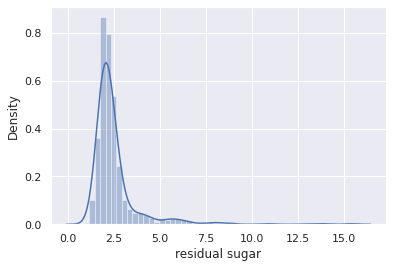

In [7]:
# Graphical representation of the distribution of the residual sugar attribute
sns.distplot(raw_data['residual sugar'])

The distribution density after the value of ~6 is low, the flat part is an anomaly, you need to get rid of it by calculating the 96th percentile.
The 96th percentile was taken because after the value of ~6, some values are still observed, but they are so few that it becomes possible to discard them, considering them an anomaly. Also, the 96th percentile was taken, since it is possible to get rid of no more than 5% of the data as insignificant, but in this case it was not necessary to lose all the permissible 5% and do with the rejection of 4 percent.

The distribution schedule began to look more realistic. Let's build a graph of the anomaly

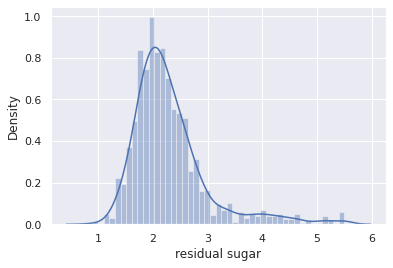

In [8]:
q = data['residual sugar'].quantile(0.96)
data1 = data[data['residual sugar'] < q]
data1.describe(include = 'all')

sns.distplot(data1['residual sugar'])

Now the graph in comparison with the original one began to look more realistic. 4% of the data was "lost", which is close to the extreme (critical) value for the dataset.

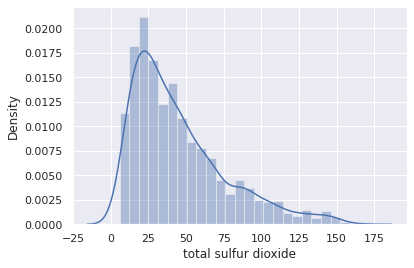

In [9]:
# Graphical representation of the distribution of the total sulphur dioxide attribute
sns.distplot(data1['total sulfur dioxide'])


The distribution density after the value 150 is low, the flat part is an anomaly, you need to get rid of it by calculating the 99th percentile.

The distribution schedule began to look more realistic. Let's build a graph without the anomaly

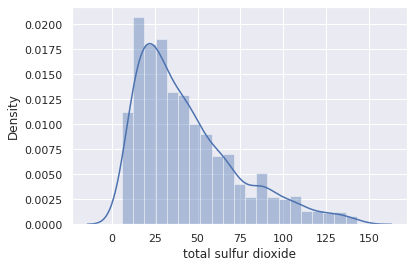

In [10]:
q = data1['total sulfur dioxide'].quantile(0.99)
data2 = data1[data1['total sulfur dioxide'] < q]
data2.describe(include = 'all')

sns.distplot(data2['total sulfur dioxide'])

Now the graph is completely filled with the data necessary for analysis without obvious anomalies.

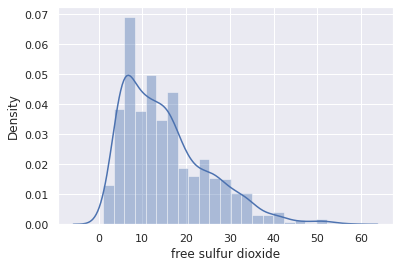

In [11]:
# Graphical representation of the distribution of the total sulphur dioxide attribute
sns.distplot(data2['free sulfur dioxide'])

The distribution density after the value of 40 is low, the flat part is an anomaly, you need to get rid of it by calculating the 99 percentile.

The distribution schedule began to look more realistic. Let's build a graph of the anomaly

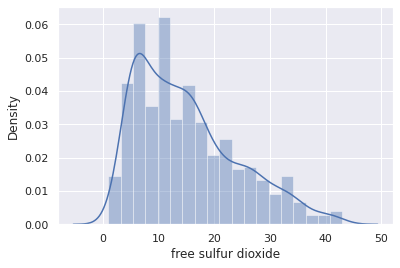

In [12]:
q = data2['free sulfur dioxide'].quantile(0.99)
data3 = data2[data1['free sulfur dioxide'] < q]
data3.describe(include = 'all')

sns.distplot(data3['free sulfur dioxide'])

After the conversion, there are completely no obvious anomalies on the graph. The data is presented in the correct form.

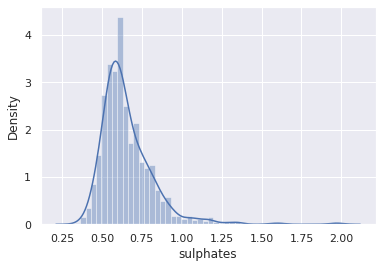

In [13]:
# Graphical representation of the distribution of the sulphates attribute
sns.distplot(data3['sulphates'])

The distribution density after the value 1.2 is low, the flat part is an anomaly, you need to get rid of it by calculating the 98th percentile, since the data after the value 1.2 is still present, but it is an anomaly.

The distribution schedule began to look more realistic. Let's build a graph of the anomaly

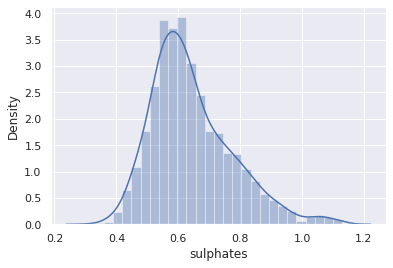

In [14]:
q = data3['sulphates'].quantile(0.98)
data4 = data3[data1['sulphates'] < q]
data4.describe(include = 'all')

sns.distplot(data4['sulphates'])

Now the graph clearly shows the data without obviously prominent anomalies and looks more realistic.

Here is a summary of the cleared data

In [15]:
data_cleaned = data4
data_cleaned.describe(include='all')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,8.310068,0.526527,0.264082,2.306122,0.083830,14.943197,43.111565,0.996651,3.317578,0.642714,10.439898,5.644218
std,1.746004,0.177732,0.192797,0.682812,0.032864,9.107837,28.603004,0.001831,0.152184,0.131684,1.060921,0.802025
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.860000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995522,3.212500,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,35.500000,0.996660,3.315000,0.620000,10.200000,6.000000
75%,9.200000,0.638750,0.420000,2.500000,0.089000,20.000000,58.000000,0.997740,3.410000,0.720000,11.100000,6.000000
max,15.600000,1.580000,0.790000,5.500000,0.415000,43.000000,143.000000,1.003200,4.010000,1.130000,14.000000,8.000000


In [18]:
#reset the index
data_cleaned.reset_index(drop=True)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1465,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1466,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1467,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1468,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


Preliminary data processing was performed and data with a normal distribution over the main parameters were obtained, where abnormal data in the form of a small number of records with large values of the given parameters are absent (or present in a small amount).